# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [204]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [205]:
# loading the data:
customers = pd.read_csv("../data/Wholesale customers data.csv")

In [206]:
customers.shape

(440, 8)

In [207]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [208]:
# Describe all dataset
customers.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [209]:
# Infos about the whole dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

In [210]:
# Checking for variables type to see indication of categorical variables
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [211]:
# Channel and Region are categorical variables because they can only assume finite (2 or 3) values
customers.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [212]:
# Checking missing values
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Ploting all distributions:

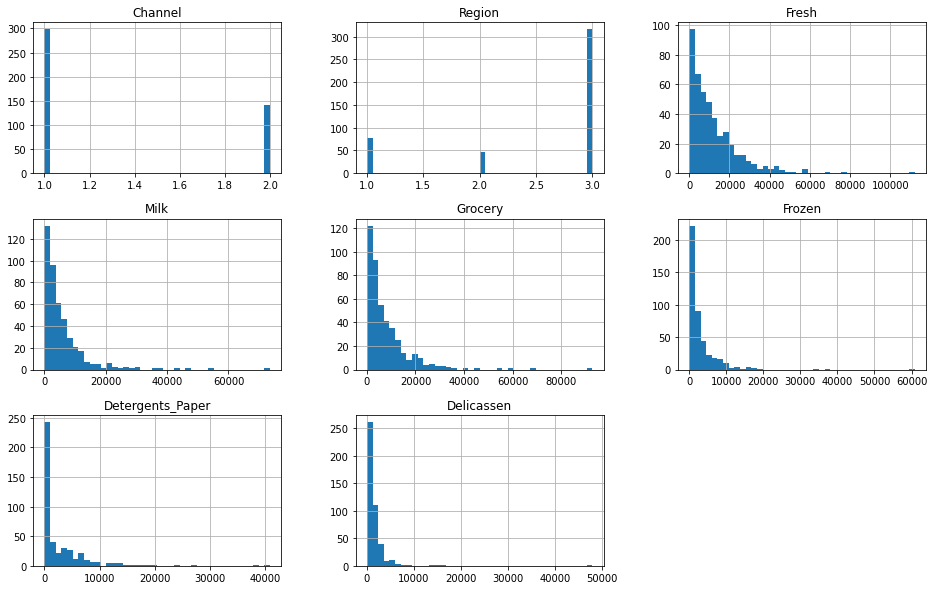

In [213]:
customers.hist(bins=40,figsize=(16,10))
plt.show()

Identifying outliers:

In [214]:
summary=customers.describe().T
summary['IQR']=summary['75%']-summary['25%']
summary['cutoff']=summary.IQR*1.6
summary['lw']=summary['25%']-summary.cutoff
summary['rw']=summary['75%']+summary.cutoff
outliers=pd.DataFrame(columns=customers.columns)

for col in summary.index:
    lower=summary.at[col,'lw'] #get lower whisker for this column
    upper=summary.at[col,'rw'] #get upper whisker for this column
    results=customers[(customers[col]<lower)|
                 (customers[col]>upper)].copy() #get the dataframe
    results['Outlier']=col #to be able to identify in which column we obtained outliers
    outliers=outliers.append(results) #save them

print(outliers.Outlier.unique())
display(outliers)
print("Number of outliers without repetition:",outliers.groupby(outliers.index).count().shape[0])

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Outlier
29,1,3,43088,2100,2609,1200,1107,823,Fresh
39,1,3,56159,555,902,10002,212,2916,Fresh
47,2,3,44466,54259,55571,7782,24171,6465,Fresh
52,2,3,40721,3916,5876,532,2587,1278,Fresh
87,1,3,43265,5025,8117,6312,1579,14351,Fresh
...,...,...,...,...,...,...,...,...,...
358,1,3,759,18664,1660,6114,536,4100,Delicassen
372,1,3,3884,3801,1641,876,397,4829,Delicassen
384,1,3,10683,21858,15400,3635,282,5120,Delicassen
409,1,3,8708,3634,6100,2349,2123,5137,Delicassen


Number of outliers without repetition: 102


In conclusion, there's outliers in every product column, totalizing 162 unique cells and 102 rows out of the 440 rows of the dataset.

<AxesSubplot:>

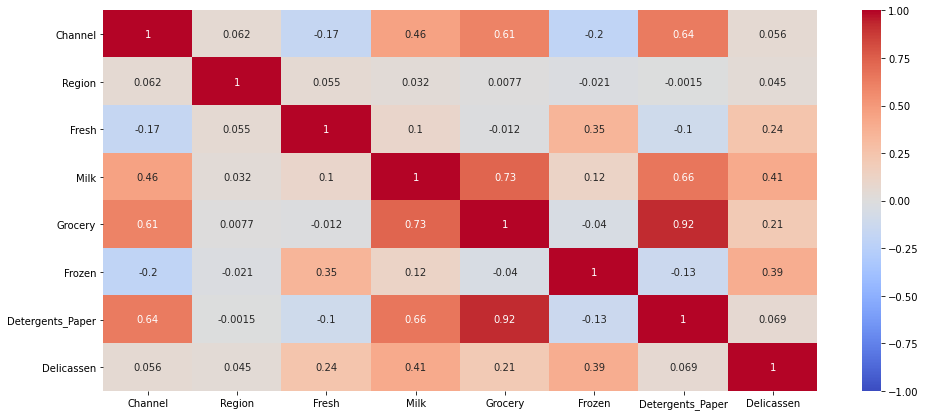

In [215]:
plt.figure(figsize=(16,7))
sns.heatmap(customers.corr(),annot=True,cmap="coolwarm",vmin=-1)

We can verify that `Grocery` and `Detergents_Paper` have a high correlation of 92%.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [216]:
# Counting the Percentage of sales per 
pd.DataFrame(customers.groupby(["Channel","Region"]).sum().sum(axis=1), columns=["Sales Percentage"])/(customers.groupby(["Channel","Region"]).sum().sum(axis=1).sum(axis=0))

Sales Percentage
Channel Region                  
1       1               0.105225
        2               0.049191
        3               0.392768
2       1               0.058037
        2               0.057180
        3               0.337599

In [217]:
# Counting the number of observations of each channel
customers[customers["Region"]==3].count()[0]/customers.shape[0]

0.7181818181818181

The tables above shows that the customer 3 accounts for 72% of all sales but it also represents 871% of the dataset.

**Therefore, we cannot verify Pareto here.**

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [218]:
# We should remove one of the columns with high correlation to avoid multicollinearity
## I will choose to remove 'Grocery' because it has also significant correlations with 'Milk' and 'Channel'
customers_transformed = customers.drop(columns='Grocery').copy()

In [219]:
customers_transformed.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

In [220]:
# The distributions are also very skewed to the left and resulting in outliers, let's try to convert them to normal
# distributions by applying the log of each column concerning the sales

for column in ['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    customers_transformed[column] = customers_transformed.apply(lambda x: np.log(customers[column]))

In [221]:
customers_transformed

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,2,3,9.446913,9.175335,5.365976,7.891331,7.198931
1,2,3,8.861775,9.191158,7.474205,8.099554,7.482119
2,2,3,8.756682,9.083416,7.785305,8.165079,8.967504
3,1,3,9.492884,7.086738,8.764678,6.228511,7.488853
4,2,3,10.026369,8.596004,8.272571,7.482682,8.553525
...,...,...,...,...,...,...,...
435,1,3,10.299003,9.396903,9.483036,5.204007,7.698029
436,1,3,10.577146,7.266129,8.414052,4.532599,7.760467
437,2,3,9.584040,9.647821,6.079933,9.605149,7.532088
438,1,3,9.238928,7.591357,6.945051,5.123964,7.661527


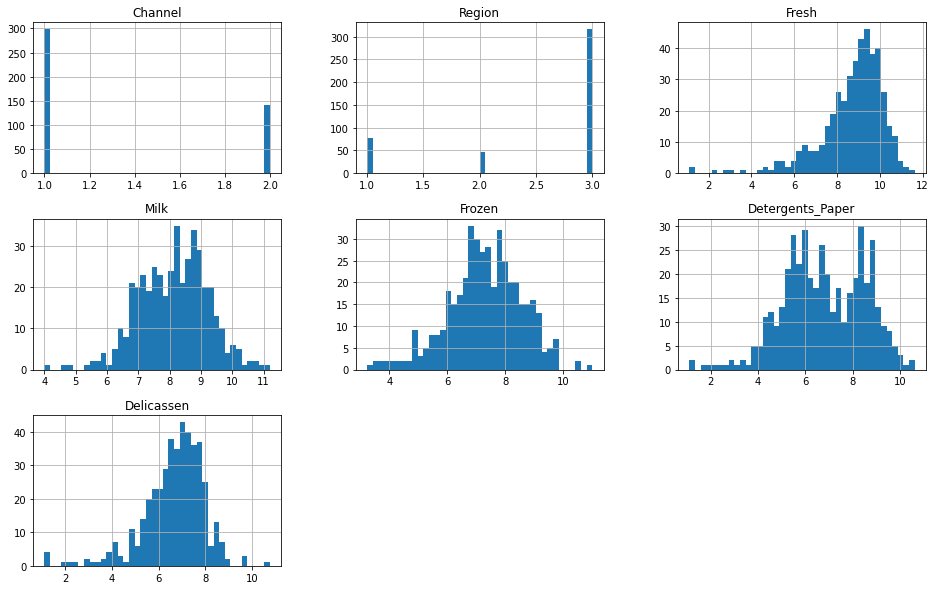

In [222]:
# Ploting the distributions once again
customers_transformed.hist(bins=40,figsize=(16,10))
plt.show()

In [223]:
# Let's eliminate eliminate outliers, but I am worried with loss of data and accuracy in clustering.

summary_Z=customers_transformed.describe().T

# left and right bounds
summary_Z['lbound']=summary_Z['mean']-3*summary_Z['std']
summary_Z['rbound']=summary_Z['mean']+3*summary_Z['std']
outliers_Z=pd.DataFrame(columns=customers_transformed.columns)

# looping to detect outliers in each column
for col in summary_Z.index:
    lower=summary_Z.at[col,'lbound'] #get lower whisker for this column
    upper=summary_Z.at[col,'rbound'] #get upper whisker for this column
    results=customers_transformed[(customers_transformed[col]<lower)|
                 (customers_transformed[col]>upper)].copy() #get the dataframe
    results['Outlier']=col #to be able to identify in which column we obtained outliers
    outliers_Z=outliers_Z.append(results) #save them

print(len(outliers_Z.index.unique()))
outliers_Z

19


,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Outlier
66,1,3,2.197225,7.335634,5.164786,8.151333,3.295837,Fresh
95,1,3,1.098612,7.979339,6.086775,5.407172,6.563856,Fresh
96,2,3,3.135494,7.869402,4.976734,8.262043,5.379897,Fresh
218,2,1,2.890372,8.923191,7.158514,8.475746,8.759669,Fresh
338,1,2,1.098612,5.808142,9.655090,2.708050,6.309918,Fresh
357,2,3,3.610918,7.150701,4.919981,8.816853,4.700480,Fresh
98,1,3,6.220590,4.718499,6.796824,4.025352,4.882802,Milk
154,1,3,6.432940,4.007333,4.317488,1.945910,2.079442,Milk
420,1,3,8.402007,8.569026,3.218876,8.827321,7.239215,Frozen
75,1,3,9.923192,7.036148,8.390949,1.098612,6.882437,Detergents_Paper


In [224]:
# registering the index of the outliers
indexes_to_drop = list(outliers_Z.index.unique())
print(len(indexes_to_drop))
print(indexes_to_drop)

19
[66, 95, 96, 218, 338, 357, 98, 154, 420, 75, 161, 204, 109, 128, 142, 183, 184, 187, 233]


In [225]:
# Droping outliers
customers_transformed.drop(indexes_to_drop, inplace=True)
customers_transformed

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,2,3,9.446913,9.175335,5.365976,7.891331,7.198931
1,2,3,8.861775,9.191158,7.474205,8.099554,7.482119
2,2,3,8.756682,9.083416,7.785305,8.165079,8.967504
3,1,3,9.492884,7.086738,8.764678,6.228511,7.488853
4,2,3,10.026369,8.596004,8.272571,7.482682,8.553525
...,...,...,...,...,...,...,...
435,1,3,10.299003,9.396903,9.483036,5.204007,7.698029
436,1,3,10.577146,7.266129,8.414052,4.532599,7.760467
437,2,3,9.584040,9.647821,6.079933,9.605149,7.532088
438,1,3,9.238928,7.591357,6.945051,5.123964,7.661527


I deliberatly didn't drop the outliers cause if I do so, I won't be able to predict their clusters.

In [226]:
customers_transformed = pd.get_dummies(customers_transformed, columns=["Channel","Region"],drop_first=True)
customers_transformed

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,9.446913,9.175335,5.365976,7.891331,7.198931,1,0,1
1,8.861775,9.191158,7.474205,8.099554,7.482119,1,0,1
2,8.756682,9.083416,7.785305,8.165079,8.967504,1,0,1
3,9.492884,7.086738,8.764678,6.228511,7.488853,0,0,1
4,10.026369,8.596004,8.272571,7.482682,8.553525,1,0,1
...,...,...,...,...,...,...,...,...
435,10.299003,9.396903,9.483036,5.204007,7.698029,0,0,1
436,10.577146,7.266129,8.414052,4.532599,7.760467,0,0,1
437,9.584040,9.647821,6.079933,9.605149,7.532088,1,0,1
438,9.238928,7.591357,6.945051,5.123964,7.661527,0,0,1


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [227]:
customers_transformed.columns

Index(['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicassen',
       'Channel_2', 'Region_2', 'Region_3'],
      dtype='object')

In [228]:
# Your import here:
from sklearn.preprocessing import StandardScaler

customers_scale = customers_transformed.copy()

# Scaling the columns from 'Fresh' (2) to 'Delicassen' (end):
customers_scale.loc[:,'Fresh':"Delicassen"] = StandardScaler().fit_transform(customers_scale.loc[:,'Fresh':"Delicassen"])
customers_scale

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,0.479109,0.990855,-1.589219,0.638490,0.402112,1,0,1
1,0.009660,1.006037,0.112770,0.765990,0.656299,1,0,1
2,-0.074655,0.902654,0.363924,0.806112,1.989569,1,0,1
3,0.515991,-1.013240,1.154580,-0.379692,0.662343,0,0,1
4,0.943999,0.434963,0.757297,0.388265,1.617984,1,0,1
...,...,...,...,...,...,...,...,...
435,1.162730,1.203458,1.734515,-1.007019,0.850098,0,0,1
436,1.385881,-0.841107,0.871517,-1.418136,0.906142,0,0,1
437,0.589124,1.444224,-1.012836,1.687899,0.701151,1,0,1
438,0.312245,-0.529037,-0.314419,-1.056031,0.817334,0,0,1


In [229]:
customers_scale

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,0.479109,0.990855,-1.589219,0.638490,0.402112,1,0,1
1,0.009660,1.006037,0.112770,0.765990,0.656299,1,0,1
2,-0.074655,0.902654,0.363924,0.806112,1.989569,1,0,1
3,0.515991,-1.013240,1.154580,-0.379692,0.662343,0,0,1
4,0.943999,0.434963,0.757297,0.388265,1.617984,1,0,1
...,...,...,...,...,...,...,...,...
435,1.162730,1.203458,1.734515,-1.007019,0.850098,0,0,1
436,1.385881,-0.841107,0.871517,-1.418136,0.906142,0,0,1
437,0.589124,1.444224,-1.012836,1.687899,0.701151,1,0,1
438,0.312245,-0.529037,-0.314419,-1.056031,0.817334,0,0,1


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [230]:
# Importing the library:
from sklearn.cluster import KMeans

In [231]:
kmeans_model = KMeans()
kmeans_model.fit(customers_scale)

KMeans()

In [232]:
kmeans_model.labels_

array([1, 1, 1, 4, 5, 1, 2, 1, 7, 1, 1, 7, 1, 1, 1, 7, 6, 3, 1, 2, 1, 4,
       5, 1, 1, 2, 4, 0, 1, 7, 5, 3, 7, 5, 3, 6, 5, 1, 6, 4, 5, 5, 2, 6,
       2, 1, 1, 1, 1, 1, 4, 2, 1, 6, 4, 3, 1, 6, 7, 1, 2, 1, 1, 1, 4, 6,
       1, 3, 2, 4, 5, 4, 5, 1, 3, 1, 0, 3, 0, 6, 1, 4, 2, 1, 1, 5, 0, 5,
       0, 4, 1, 5, 2, 0, 4, 1, 1, 1, 5, 7, 7, 6, 1, 6, 4, 1, 5, 4, 4, 4,
       7, 3, 4, 4, 4, 4, 0, 2, 5, 5, 4, 1, 7, 4, 0, 7, 0, 7, 0, 1, 2, 7,
       3, 5, 7, 4, 2, 1, 7, 7, 0, 7, 7, 3, 4, 3, 6, 1, 4, 1, 6, 1, 4, 1,
       2, 1, 1, 3, 0, 0, 6, 6, 6, 6, 3, 6, 5, 7, 7, 3, 7, 5, 6, 4, 4, 1,
       6, 4, 0, 0, 6, 7, 5, 5, 1, 4, 7, 1, 1, 5, 0, 6, 0, 2, 3, 1, 7, 1,
       7, 1, 1, 1, 6, 4, 0, 4, 2, 4, 3, 0, 7, 1, 4, 0, 4, 5, 3, 7, 5, 3,
       0, 4, 0, 5, 5, 4, 4, 7, 1, 1, 7, 0, 7, 4, 3, 1, 4, 7, 5, 4, 7, 4,
       5, 5, 7, 4, 7, 4, 6, 5, 6, 5, 1, 0, 0, 3, 3, 5, 3, 3, 5, 4, 4, 1,
       3, 1, 5, 5, 5, 0, 2, 4, 0, 0, 3, 4, 3, 1, 7, 2, 4, 2, 1, 0, 1, 2,
       2, 2, 6, 6, 1, 7, 7, 6, 4, 4, 2, 4, 7, 1, 4,

In [233]:
customers_droped = customers.drop(indexes_to_drop).copy()
customers_droped['labels'] = kmeans_model.labels_

In [234]:
customers_droped

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,5
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,5
436,1,3,39228,1431,764,4510,93,2346,4
437,2,3,14531,15488,30243,437,14841,1867,1
438,1,3,10290,1981,2232,1038,168,2125,7


Count the values in `labels`.

In [235]:
len(kmeans_model.labels_)

421

In [236]:
print("Number of clusters:",len(set(kmeans_model.labels_)))

Number of clusters: 8


In [237]:
customers_droped.labels.value_counts()

1    89
4    78
7    54
5    50
0    45
3    42
6    33
2    30
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [238]:
# Importing library
from sklearn.cluster import DBSCAN

In [251]:
customers_scale

,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,0.479109,0.990855,-1.589219,0.638490,0.402112,1,0,1
1,0.009660,1.006037,0.112770,0.765990,0.656299,1,0,1
2,-0.074655,0.902654,0.363924,0.806112,1.989569,1,0,1
3,0.515991,-1.013240,1.154580,-0.379692,0.662343,0,0,1
4,0.943999,0.434963,0.757297,0.388265,1.617984,1,0,1
...,...,...,...,...,...,...,...,...
435,1.162730,1.203458,1.734515,-1.007019,0.850098,0,0,1
436,1.385881,-0.841107,0.871517,-1.418136,0.906142,0,0,1
437,0.589124,1.444224,-1.012836,1.687899,0.701151,1,0,1
438,0.312245,-0.529037,-0.314419,-1.056031,0.817334,0,0,1


In [247]:
dbscan_model = DBSCAN(eps=0.5)
dbscan_model.fit(customers_scale)

DBSCAN(eps=1000)

In [248]:
customers_droped['labels_DBSCAN'] = dbscan_model.labels_
customers_droped

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,0
1,2,3,7057,9810,9568,1762,3293,1776,1,0
2,2,3,6353,8808,7684,2405,3516,7844,1,0
3,1,3,13265,1196,4221,6404,507,1788,4,0
4,2,3,22615,5410,7198,3915,1777,5185,5,0
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,5,0
436,1,3,39228,1431,764,4510,93,2346,4,0
437,2,3,14531,15488,30243,437,14841,1867,1,0
438,1,3,10290,1981,2232,1038,168,2125,7,0


Count the values in `labels_DBSCAN`.

In [249]:
print("Number of clusters:",len(set(dbscan_model.labels_)))

Number of clusters: 1


In [250]:
# Your code here
customers_droped['labels_DBSCAN'].value_counts()

0    421
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

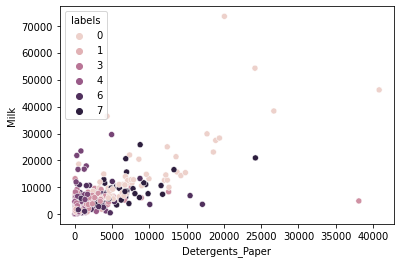

In [199]:
# Your code here:
sns.scatterplot(customers_droped["Detergents_Paper"],customers_droped["Milk"], hue=customers_droped.labels)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

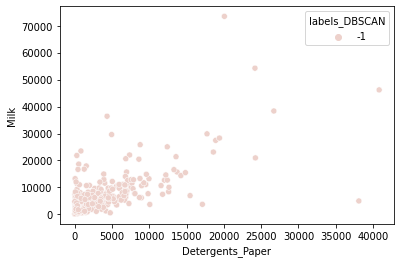

In [200]:
# Your code here:
sns.scatterplot(customers_droped["Detergents_Paper"],customers_droped["Milk"], hue=customers_droped["labels_DBSCAN"])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [41]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'labels', 'labels_DBSCAN'],
      dtype='object')

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grocery', ylabel='Fresh'>

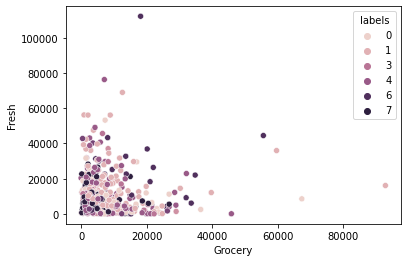

In [42]:
# For KMeans
sns.scatterplot(customers_droped["Grocery"],customers_droped["Fresh"], hue=customers_droped["labels"])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grocery', ylabel='Fresh'>

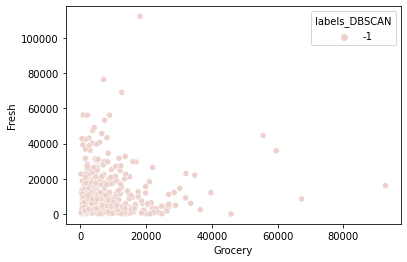

In [201]:
# For DBSCAN
sns.scatterplot(customers_droped["Grocery"],customers_droped["Fresh"], hue=customers_droped["labels_DBSCAN"])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>

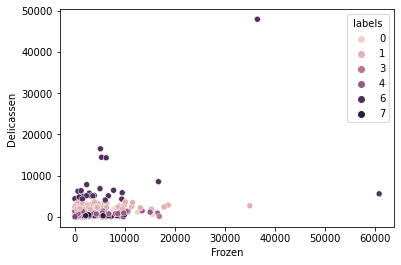

In [44]:
# For KMeans
sns.scatterplot(customers_droped["Frozen"],customers_droped["Delicassen"], hue=customers_droped["labels"])

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>

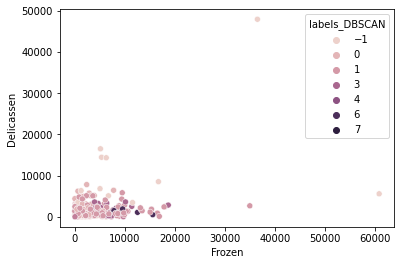

In [45]:
# For DBSCAN
sns.scatterplot(customers_droped["Frozen"],customers_droped["Delicassen"], hue=customers_droped["labels_DBSCAN"])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [202]:
# For K-means
customers_droped.groupby("labels").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0,1.920635,2.603175,9203.777778,15027.666667,19403.444444,2428.761905,8946.539683,2367.936508,-1.0
1,1.023529,2.364706,15465.576471,2045.376471,2871.741176,3981.400000,438.129412,1242.741176,-1.0
2,1.622222,2.600000,14797.466667,6003.888889,10221.822222,734.088889,3824.377778,1894.888889,-1.0
3,1.000000,2.657143,2090.628571,3227.114286,3269.514286,1089.771429,491.342857,1261.971429,-1.0
4,1.014493,2.565217,10998.362319,1215.681159,1987.478261,2765.985507,312.521739,371.652174,-1.0
5,1.063830,2.595745,29208.170213,6897.574468,6861.893617,9826.808511,1071.234043,3250.404255,-1.0
6,1.400000,2.466667,8118.555556,4604.044444,6870.333333,1034.711111,3107.622222,237.577778,-1.0
7,1.875000,2.625000,938.593750,9894.312500,16368.937500,515.125000,7298.750000,1111.250000,-1.0


In [203]:
# For DBSCAN
customers_droped.groupby("labels_DBSCAN").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1,1.327791,2.539192,12257.745843,5785.254157,7918.16152,3036.498812,2934.63658,1446.356295,3.052257


Which algorithm appears to perform better?

In [47]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [48]:
# Your code here

In [49]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [50]:
# Your code here

In [51]:
# Your comment here